In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
data_dir = 'F:\colon disease'

In [3]:
os.listdir(data_dir)

['test', 'train', 'val']

In [4]:
from matplotlib.image import imread

In [5]:
train_path = data_dir+'\\train\\'
test_path = data_dir+'\\test\\'

In [6]:
os.listdir(train_path+'\\0_normal\\')[0]

'train_normal_ (1).jpg'

In [7]:
x=train_path+'0_normal\\'+'train_normal_ (1).jpg'
x

'F:\\colon disease\\train\\0_normal\\train_normal_ (1).jpg'

In [8]:
imread(x).max()

255

In [9]:
dim1 = []
dim2 = []
for image in os.listdir(train_path+'0_normal'):
    img = imread(train_path+'0_normal\\'+image)
    d1,d2,c = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

In [10]:
round(np.mean(dim1))
round(np.mean(dim2))

676

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rescale = 1/255,horizontal_flip=True,vertical_flip = True)

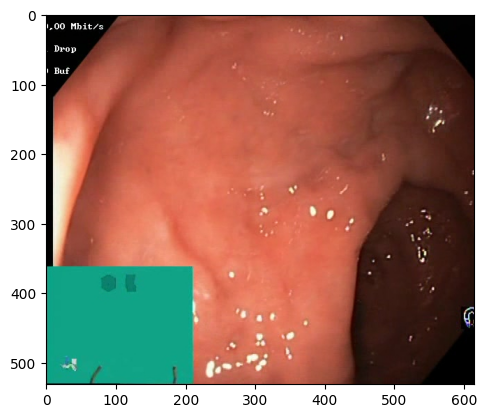

In [13]:
plt.imshow(imread(x))

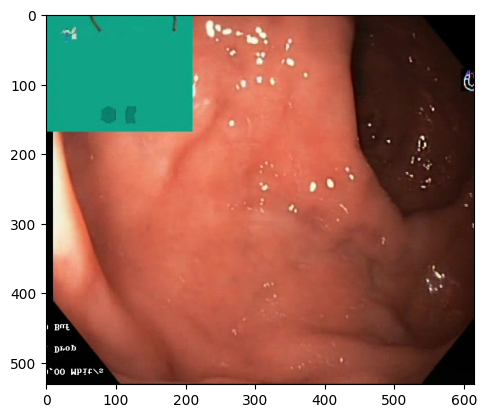

In [14]:
plt.imshow(image_gen.random_transform(imread(x)))

In [15]:
image_gen.flow_from_directory(train_path)

Found 3200 images belonging to 4 classes.


In [16]:
image_shape=(round(np.mean(dim1)),round(np.mean(dim2)),3)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [18]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Drop(0.5))

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [21]:
batch_size = 16

In [22]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=16, class_mode='categorical')

Found 3200 images belonging to 4 classes.


In [23]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=16, class_mode='categorical',shuffle=False)

Found 800 images belonging to 4 classes.


In [24]:
train_image_gen.class_indices

{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

In [25]:
results=model.fit_generator(train_image_gen, epochs=2,validation_data=test_image_gen, callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
200/200 [==============================] - 3503s 18s/step - loss: 0.2713 - accuracy: 0.9144 - val_loss: 1.5006 - val_accuracy: 0.7300
Epoch 2/2
200/200 [==============================] - 3353s 17s/step - loss: 0.0785 - accuracy: 0.9797 - val_loss: 3.9109 - val_accuracy: 0.7212


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 552, 674, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 276, 337, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 274, 335, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 137, 167, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 135, 165, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 67, 82, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87904)             0

In [32]:
pred = model.predict_generator(test_image_gen)

In [ ]:
'F:\colon disease\\val\\0_normal\\val_normal_ (1).jpg'

In [57]:
os.listdir('F:\colon disease\\val\\0_normal')

['val_normal_ (1).jpg',
 'val_normal_ (10).jpg',
 'val_normal_ (100).jpg',
 'val_normal_ (101).jpg',
 'val_normal_ (102).jpg',
 'val_normal_ (103).jpg',
 'val_normal_ (104).jpg',
 'val_normal_ (105).jpg',
 'val_normal_ (106).jpg',
 'val_normal_ (107).jpg',
 'val_normal_ (108).jpg',
 'val_normal_ (109).jpg',
 'val_normal_ (11).jpg',
 'val_normal_ (110).jpg',
 'val_normal_ (111).jpg',
 'val_normal_ (112).jpg',
 'val_normal_ (113).jpg',
 'val_normal_ (114).jpg',
 'val_normal_ (115).jpg',
 'val_normal_ (116).jpg',
 'val_normal_ (117).jpg',
 'val_normal_ (118).jpg',
 'val_normal_ (119).jpg',
 'val_normal_ (12).jpg',
 'val_normal_ (120).jpg',
 'val_normal_ (121).jpg',
 'val_normal_ (122).jpg',
 'val_normal_ (123).jpg',
 'val_normal_ (124).jpg',
 'val_normal_ (125).jpg',
 'val_normal_ (126).jpg',
 'val_normal_ (127).jpg',
 'val_normal_ (128).jpg',
 'val_normal_ (129).jpg',
 'val_normal_ (13).jpg',
 'val_normal_ (130).jpg',
 'val_normal_ (131).jpg',
 'val_normal_ (132).jpg',
 'val_normal_ (133

In [58]:
from tensorflow.keras.preprocessing import image

In [103]:
single_image = image.load_img('F:\colon disease\\val\\1_ulcerative_colitis\\val_ulcer_ (97).jpg')

In [79]:
image_shape

(554, 676, 3)

In [104]:
from PIL import Image
original_image = Image.open('F:\colon disease\\val\\1_ulcerative_colitis\\val_ulcer_ (97).jpg')
reshape_image = original_image.resize((676,554))

In [105]:
a=np.expand_dims(image.img_to_array(image.img_to_array(reshape_image)),axis=0)

In [106]:
model.predict(a)

array([[0., 0., 1., 0.]], dtype=float32)

In [41]:
test_image_gen.class_indices

{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

In [113]:
np.argma(pred)

,0,1,2,3
600,1.133354e-03,8.195353e-02,5.945376e-03,0.910968
601,3.511065e-04,8.735415e-04,6.290323e-05,0.998712
602,4.260158e-01,1.742284e-04,5.738090e-01,0.000001
603,3.874866e-04,4.652562e-02,1.063204e-03,0.952024
604,3.456169e-05,7.939844e-03,1.930815e-04,0.991832
...,...,...,...,...
795,6.218220e-08,1.027658e-07,1.981505e-12,1.000000
796,1.339978e-06,1.403282e-08,2.292006e-13,0.999999
797,1.748308e-06,6.297536e-05,1.463355e-06,0.999934
798,4.327318e-05,3.731104e-03,8.470308e-06,0.996217
